In [209]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import seaborn as sns
import collections
from sklearn.metrics import accuracy_score, confusion_matrix
import os

## Prepare data

In [179]:
data_red = pd.read_csv(os.path.join(os.getcwd(), 'winequality-red.csv'))
data_white = pd.read_csv(os.path.join(os.getcwd(), 'winequality-white.csv'))

In [180]:
frames = [data_red, data_white]
data = pd.concat(frames)

In [181]:
data.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [183]:
data.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


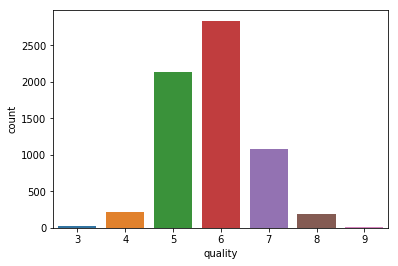

In [184]:
sns.countplot(data['quality'])

In [185]:
collections.Counter(data['quality'])

Counter({5: 2138, 6: 2836, 7: 1079, 4: 216, 8: 193, 3: 30, 9: 5})

In [214]:
X = data.drop('quality', axis=1)
y = data['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.11, random_state=1)
print(X_train.shape, X_val.shape, X_test.shape)
print(y_train.shape, y_val.shape, y_test.shape)

(5203, 11) (644, 11) (650, 11)
(5203,) (644,) (650,)


In [215]:
X_scaler = StandardScaler()
y_encoder = LabelEncoder()
X_train = X_scaler.fit_transform(X_train)
X_val = X_scaler.transform(X_val)
X_test = X_scaler.transform(X_test)
y_encoder.fit(y_train)
y_train = to_categorical(y_encoder.transform(y_train), num_classes=7)
y_val = to_categorical(y_encoder.transform(y_val), num_classes=7)
y_test = to_categorical(y_encoder.transform(y_test), num_classes=7)

In [219]:
def plot_history(history):
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Abs Error [1000$]')
    plt.plot(history.epoch, np.array(history.history['loss']),
           label='Train Loss')
    plt.plot(history.epoch, np.array(history.history['val_loss']),
           label = 'Val loss')
    plt.legend()

In [220]:
def plot_confusion_matrix(cm, classes=None, title='Confusion matrix'):
    """Plots a confusion matrix."""
    if classes is not None:
        sns.heatmap(cm, xticklabels=classes, yticklabels=classes, vmin=0., vmax=1., annot=True)
    else:
        sns.heatmap(cm, vmin=0., vmax=1.)
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

## Models 

In [227]:
model = keras.Sequential([
    keras.layers.Dense(7, input_shape=(11,)),
    keras.layers.Activation('relu'),
    keras.layers.Dense(7),
    keras.layers.Activation('softmax')
])
optimizer = tf.train.AdamOptimizer(0.001)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [228]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_40 (Dense)             (None, 7)                 84        
_________________________________________________________________
activation_34 (Activation)   (None, 7)                 0         
_________________________________________________________________
dense_41 (Dense)             (None, 7)                 56        
_________________________________________________________________
activation_35 (Activation)   (None, 7)                 0         
Total params: 140
Trainable params: 140
Non-trainable params: 0
_________________________________________________________________


In [229]:
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=0, mode='auto')

In [230]:
history = model.fit(X_train, y_train, epochs=1000, validation_data=[X_val, y_val], callbacks=[early_stop])

Train on 5203 samples, validate on 644 samples
Epoch 1/1000
5203/5203 [==============================] - 1s 229us/step - loss: 1.8479 - acc: 0.3561 - val_loss: 1.6153 - val_acc: 0.4224
Epoch 2/1000
5203/5203 [==============================] - 0s 60us/step - loss: 1.4856 - acc: 0.4715 - val_loss: 1.3932 - val_acc: 0.4534
Epoch 3/1000
5203/5203 [==============================] - 0s 56us/step - loss: 1.3234 - acc: 0.5011 - val_loss: 1.2878 - val_acc: 0.4845
Epoch 4/1000
5203/5203 [==============================] - 0s 64us/step - loss: 1.2405 - acc: 0.5132 - val_loss: 1.2331 - val_acc: 0.5124
Epoch 5/1000
5203/5203 [==============================] - 0s 58us/step - loss: 1.1937 - acc: 0.5251 - val_loss: 1.2017 - val_acc: 0.5248
Epoch 6/1000
5203/5203 [==============================] - 0s 62us/step - loss: 1.1637 - acc: 0.5332 - val_loss: 1.1820 - val_acc: 0.5326
Epoch 7/1000
5203/5203 [==============================] - 0s 66us/step - loss: 1.1429 - acc: 0.5397 - val_loss: 1.1695 - val_acc: 

5203/5203 [==============================] - 0s 57us/step - loss: 1.0381 - acc: 0.5574 - val_loss: 1.1136 - val_acc: 0.5512
Epoch 61/1000
5203/5203 [==============================] - 0s 55us/step - loss: 1.0381 - acc: 0.5587 - val_loss: 1.1115 - val_acc: 0.5512
Epoch 62/1000
5203/5203 [==============================] - 0s 57us/step - loss: 1.0376 - acc: 0.5578 - val_loss: 1.1110 - val_acc: 0.5512
Epoch 63/1000
5203/5203 [==============================] - 0s 63us/step - loss: 1.0376 - acc: 0.5570 - val_loss: 1.1093 - val_acc: 0.5512
Epoch 64/1000
5203/5203 [==============================] - 0s 55us/step - loss: 1.0368 - acc: 0.5539 - val_loss: 1.1087 - val_acc: 0.5404
Epoch 65/1000
5203/5203 [==============================] - 0s 51us/step - loss: 1.0359 - acc: 0.5576 - val_loss: 1.1090 - val_acc: 0.5481
Epoch 66/1000
5203/5203 [==============================] - 0s 55us/step - loss: 1.0359 - acc: 0.5560 - val_loss: 1.1087 - val_acc: 0.5450
Epoch 67/1000
5203/5203 [=======================

5203/5203 [==============================] - 0s 65us/step - loss: 1.0213 - acc: 0.5601 - val_loss: 1.0923 - val_acc: 0.5512
Epoch 120/1000
5203/5203 [==============================] - 0s 57us/step - loss: 1.0212 - acc: 0.5614 - val_loss: 1.0928 - val_acc: 0.5559
Epoch 121/1000
5203/5203 [==============================] - 0s 59us/step - loss: 1.0211 - acc: 0.5647 - val_loss: 1.0925 - val_acc: 0.5543
Epoch 122/1000
5203/5203 [==============================] - 0s 57us/step - loss: 1.0209 - acc: 0.5620 - val_loss: 1.0914 - val_acc: 0.5466
Epoch 123/1000
5203/5203 [==============================] - 0s 58us/step - loss: 1.0208 - acc: 0.5628 - val_loss: 1.0930 - val_acc: 0.5466
Epoch 124/1000
5203/5203 [==============================] - 0s 58us/step - loss: 1.0206 - acc: 0.5641 - val_loss: 1.0919 - val_acc: 0.5481
Epoch 125/1000
5203/5203 [==============================] - 0s 57us/step - loss: 1.0200 - acc: 0.5656 - val_loss: 1.0903 - val_acc: 0.5481
Epoch 126/1000
5203/5203 [================

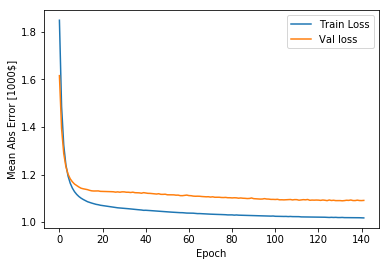

In [231]:
plot_history(history)

In [232]:
pred = np.round(model.predict(X_test).argmax(axis=1).reshape(-1,))
accuracy_score(pred, y_test.argmax(axis=1))

0.5507692307692308